# Project 1 TL


## Let's get started with our `admissions.csv` dataset

#### 1. Create a data dictionary 

Answer: 

Variable | Description | Type of Variable
---| ---| ---
Admit | 0 = not admitted 1 = admitted | binary
GRE | standarized test score | continuous 
GPA | grade point average | continuous
Prestige | the rank of an applicant's undergraduate alma mater, with 1 being the highest and 4 as the lowest | categorical


We would like to explore the association between GRE, GPA, the prestige of the applicant's alma mater, and whether an appicant was admitted or not.

#### 2. What is the outcome?

Answer: Whether a grad school student applicant was admitted or not.

#### 3. What are the predictors/covariates? 

Answer: GRE, GPA, Prestige (rank).

#### 4. What timeframe is this data relevant for?

Answer: Prior to 2013 / Unknown.

#### 5. What is the hypothesis?

Answer: A better Prestige rank is more important for admittance than GRE or GPA score.

#### 6. Using the above information, write a well-formed problem statement. 


Answer: Based on the admissions data set, we're very confident that there is an inverse relationship between the probability of being admitted and the prestige of a candidate's undergraduate school.

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: One goal is to compare statistical analysis amongst the 4 different Prestige ranks and who was admitted or not. After separating applicants by Prestige, one could explore the ratio of admitted vs not-admitted. Data visualization graphs can be used to show correlation between GRE, GPA, and std dev of those admitted/not-admitted.

#### 2a. What are the assumptions regarding the distribution of the data? 

Answer: There is an assumption that the data is properly recorded and clean. Another assumption that the data falls under a standard normal distribution. Another assumption is no, or minimal, bias among sample data.

#### 2b. How will you determine the distribution of your data? 

Answer: Calculate std dev and plot data to see if it is normally distributed.

#### 3a. How might outliers impact your analysis? 

Answer: 

#### 3b. How will you test for outliers? 

Answer:

#### 4. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: 

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model

In [1]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

In [2]:
df = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")

In [3]:
print df.head()

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


In [4]:
df.columns = ["admit", "gre", "gpa", "prestige"]
print df.columns


Index([u'admit', u'gre', u'gpa', u'prestige'], dtype='object')


In [5]:
print df.describe()

            admit         gre         gpa   prestige
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000


In [6]:
print df.std()

admit         0.466087
gre         115.516536
gpa           0.380567
prestige      0.944460
dtype: float64


In [7]:
print pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige   1   2   3   4
admit                   
0         28  97  93  55
1         33  54  28  12


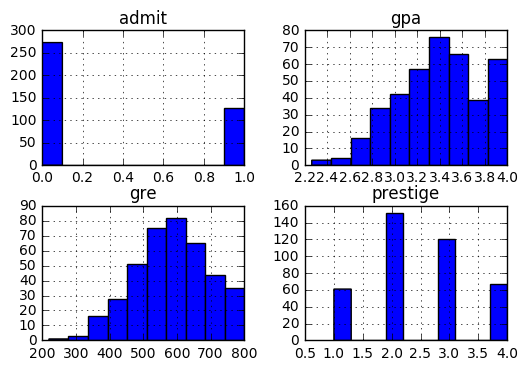

In [8]:
df.hist()
pl.show()

In [9]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
print dummy_ranks.head()

   prestige_1  prestige_2  prestige_3  prestige_4
0         0.0         0.0         1.0         0.0
1         0.0         0.0         1.0         0.0
2         1.0         0.0         0.0         0.0
3         0.0         0.0         0.0         1.0
4         0.0         0.0         0.0         1.0


In [10]:
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
print data.head()

   admit  gre   gpa  prestige_2  prestige_3  prestige_4
0      0  380  3.61         0.0         1.0         0.0
1      1  660  3.67         0.0         1.0         0.0
2      1  800  4.00         0.0         0.0         0.0
3      1  640  3.19         0.0         0.0         1.0
4      0  520  2.93         0.0         0.0         1.0


In [11]:
data['intercept'] = 1.0

In [12]:
train_cols = data.columns[1:]

In [13]:
logit = sm.Logit(data['admit'], data[train_cols])

In [14]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


In [15]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Tue, 31 Jan 2017   Pseudo R-squ.:                 0.08292
Time:                        20:39:52   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038         0.000     0.004
gpa            0.8040      0.332      2.423      0.015         0.154     1.454
prestige_2    -0.6754      0.316     -2.134      0.0

In [16]:
print result.conf_int()

                   0         1
gre         0.000120  0.004409
gpa         0.153684  1.454391
prestige_2 -1.295751 -0.055135
prestige_3 -2.016992 -0.663416
prestige_4 -2.370399 -0.732529
intercept  -6.224242 -1.755716


In [17]:
print np.exp(result.params)

gre           1.002267
gpa           2.234545
prestige_2    0.508931
prestige_3    0.261792
prestige_4    0.211938
intercept     0.018500
dtype: float64


In [18]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                2.5%     97.5%        OR
gre         1.000120  1.004418  1.002267
gpa         1.166122  4.281877  2.234545
prestige_2  0.273692  0.946358  0.508931
prestige_3  0.133055  0.515089  0.261792
prestige_4  0.093443  0.480692  0.211938
intercept   0.001981  0.172783  0.018500
